In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
claim = pd.read_csv("Train_Claim.csv")
Demog=pd.read_csv("Train_Demographics.csv")
policy=pd.read_csv("Train_Policy.csv")
vehicle=pd.read_csv("Train_Vehicle.csv")
target=pd.read_csv("Traindata_with_Target.csv")

In [3]:
claim

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,1,NO,0,3,?,6590,870,1078,4642
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,1,YES,0,2,YES,74547,14699,7875,51973
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,1,YES,2,0,YES,55305,7043,7043,41219
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,1,?,2,0,YES,55830,7059,7059,41712


In [4]:
Demog

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India
...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India


In [5]:
policy

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007
...,...,...,...,...,...,...,...,...,...,...
28831,148614,425,1999-10-12,State3,250/500,1000,839.81,0,wife,Cust39493
28832,148615,367,1996-11-09,State3,250/500,1000,811.03,0,husband,Cust39494
28833,148616,208,1995-12-04,State3,250/500,1000,891.37,0,husband,Cust39495
28834,148618,401,1994-09-12,State3,250/500,856,911.37,0,own-child,Cust39497


In [6]:
vehicle

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
...,...,...,...
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680


In [7]:
vehicle = vehicle.pivot(index='CustomerID', columns='VehicleAttribute', values='VehicleAttributeDetails').reset_index()
vehicle.columns.name = None  # To remove the "VehicleAttribute" label from the top row
vehicle

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,Vehicle26917,Audi,A5,2008
1,Cust10001,Vehicle15893,Audi,A5,2006
2,Cust10002,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...,...
28831,Cust9993,Vehicle13568,Suburu,Impreza,2007
28832,Cust9994,Vehicle19810,Jeep,Wrangler,2003
28833,Cust9996,Vehicle3339,Suburu,Legacy,2004
28834,Cust9997,Vehicle10240,Suburu,Forrestor,2004


In [8]:
target

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


In [9]:
claim_Demog = pd.merge(claim, Demog, how='left', on=['CustomerID'])
claim_Demog

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,46013,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,39903,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,43495,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,42237,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,37481,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,...,4642,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,51973,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,41219,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,41712,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India


In [10]:
claim_Demog_policy = pd.merge(claim_Demog, policy, how='left', on=['CustomerID'])
claim_Demog_policy 

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,India,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,India,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,India,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,India,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,India,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,...,India,119114,321,1998-04-18,State1,500/1000,655,1276.01,0,unmarried
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,India,119115,237,2004-09-07,State2,100/300,1089,1273.38,0,unmarried
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,India,119117,392,1998-09-10,State3,250/500,787,1380.92,3448735,own-child
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,India,119118,391,1998-08-10,State3,250/500,780,1389.29,3364301,not-in-family


In [11]:
claim_Demog_policy_vehicle = pd.merge(claim_Demog_policy, vehicle, how='left', on=['CustomerID'])
claim_Demog_policy_vehicle 

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,State1,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,State1,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,State3,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,State2,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,State2,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,...,State1,500/1000,655,1276.01,0,unmarried,Vehicle13568,Suburu,Impreza,2007
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,State2,100/300,1089,1273.38,0,unmarried,Vehicle19810,Jeep,Wrangler,2003
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,State3,250/500,787,1380.92,3448735,own-child,Vehicle3339,Suburu,Legacy,2004
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,State3,250/500,780,1389.29,3364301,not-in-family,Vehicle10240,Suburu,Forrestor,2004


In [12]:
Fraud_detect = pd.merge(claim_Demog_policy_vehicle, target, how='left', on=['CustomerID'])
Fraud_detect 

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,...,500/1000,655,1276.01,0,unmarried,Vehicle13568,Suburu,Impreza,2007,N
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,100/300,1089,1273.38,0,unmarried,Vehicle19810,Jeep,Wrangler,2003,N
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,250/500,787,1380.92,3448735,own-child,Vehicle3339,Suburu,Legacy,2004,N
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,250/500,780,1389.29,3364301,not-in-family,Vehicle10240,Suburu,Forrestor,2004,N


In [13]:
Fraud_detect.isnull().sum()

CustomerID                     0
DateOfIncident                 0
TypeOfIncident                 0
TypeOfCollission               0
SeverityOfIncident             0
AuthoritiesContacted           0
IncidentState                  0
IncidentCity                   0
IncidentAddress                0
IncidentTime                   0
NumberOfVehicles               0
PropertyDamage                 0
BodilyInjuries                 0
Witnesses                      0
PoliceReport                   0
AmountOfTotalClaim             0
AmountOfInjuryClaim            0
AmountOfPropertyClaim          0
AmountOfVehicleDamage          0
InsuredAge                     0
InsuredZipCode                 0
InsuredGender                 30
InsuredEducationLevel          0
InsuredOccupation              0
InsuredHobbies                 0
CapitalGains                   0
CapitalLoss                    0
Country                        2
InsurancePolicyNumber          0
CustomerLoyaltyPeriod          0
DateOfPoli

In [14]:
for i in Fraud_detect.columns:
    print(i,Fraud_detect[i].unique())


CustomerID ['Cust10000' 'Cust10001' 'Cust10002' ... 'Cust9996' 'Cust9997' 'Cust9999']
DateOfIncident ['2015-02-03' '2015-02-02' '2015-01-15' '2015-01-19' '2015-01-09'
 '2015-02-07' '2015-01-30' '2015-01-12' '2015-02-06' '2015-01-25'
 '2015-02-10' '2015-02-22' '2015-02-25' '2015-01-02' '2015-02-28'
 '2015-01-03' '2015-01-29' '2015-02-23' '2015-01-28' '2015-02-26'
 '2015-01-27' '2015-01-16' '2015-01-17' '2015-02-04' '2015-01-05'
 '2015-01-10' '2015-02-11' '2015-01-13' '2015-01-06' '2015-01-07'
 '2015-02-17' '2015-02-12' '2015-02-13' '2015-01-26' '2015-02-21'
 '2015-02-14' '2015-02-15' '2015-01-20' '2015-01-24' '2015-01-08'
 '2015-01-11' '2015-02-09' '2015-02-27' '2015-02-24' '2015-01-18'
 '2015-02-08' '2015-01-22' '2015-02-19' '2015-02-18' '2015-02-16'
 '2015-01-04' '2015-02-05' '2015-01-01' '2015-01-23' '2015-01-21'
 '2015-01-14' '2015-02-20' '2015-01-31' '2015-03-06' '2015-03-01'
 '2015-03-04' '2015-03-03' '2015-03-02' '2015-02-01' '2015-03-05'
 '2015-03-09' '2015-03-11' '2015-03-07' '

In [15]:
Fraud_detect['TypeOfCollission']=Fraud_detect['TypeOfCollission'].replace('?',np.nan)
Fraud_detect['PropertyDamage']=Fraud_detect['PropertyDamage'].replace('?',np.nan)
Fraud_detect['PoliceReport']=Fraud_detect['PoliceReport'].replace('?',np.nan)
Fraud_detect['VehicleMake']=Fraud_detect['VehicleMake'].replace('???',np.nan)
Fraud_detect['Witnesses']=Fraud_detect['Witnesses'].replace('MISSINGVALUE',np.nan)

In [16]:
Fraud_detect['TypeOfCollission'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision', nan],
      dtype=object)

In [17]:
Fraud_detect.isna().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                      0
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim                0
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [18]:
Fraud_detect.isna().mean().sort_values()

CustomerID                    0.000000
InsuredEducationLevel         0.000000
InsuredOccupation             0.000000
InsuredHobbies                0.000000
CapitalGains                  0.000000
CapitalLoss                   0.000000
InsurancePolicyNumber         0.000000
CustomerLoyaltyPeriod         0.000000
VehicleYOM                    0.000000
DateOfPolicyCoverage          0.000000
Policy_CombinedSingleLimit    0.000000
Policy_Deductible             0.000000
PolicyAnnualPremium           0.000000
UmbrellaLimit                 0.000000
InsuredRelationship           0.000000
VehicleID                     0.000000
VehicleModel                  0.000000
InsurancePolicyState          0.000000
InsuredAge                    0.000000
InsuredZipCode                0.000000
AmountOfPropertyClaim         0.000000
DateOfIncident                0.000000
TypeOfIncident                0.000000
SeverityOfIncident            0.000000
AuthoritiesContacted          0.000000
IncidentState            

In [19]:
Fraud_detect.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                    int64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim             object
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

In [20]:
Fraud_detect['TypeOfCollission']=Fraud_detect['TypeOfCollission'].fillna(method="ffill")
Fraud_detect['PropertyDamage']=Fraud_detect['PropertyDamage'].fillna(method="bfill")
Fraud_detect['InsuredGender']=Fraud_detect['InsuredGender'].fillna(method="ffill")
Fraud_detect['PoliceReport']=Fraud_detect['PoliceReport'].fillna(method="bfill")
Fraud_detect['VehicleMake']=Fraud_detect['VehicleMake'].fillna(method="ffill")
Fraud_detect['Witnesses']=Fraud_detect['Witnesses'].fillna(method="ffill")
Fraud_detect['Country']=Fraud_detect['Country'].fillna(method="ffill")


In [21]:
Fraud_detect['PropertyDamage'].nunique()

2

In [22]:
Fraud_detect['PropertyDamage'].unique()

array(['YES', 'NO'], dtype=object)

In [23]:
Fraud_detect.isna().sum()

CustomerID                    0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

In [24]:
Fraud_detect.drop(Fraud_detect[['DateOfIncident','VehicleID' ,'InsuredHobbies','Country']], axis=1, inplace=True)


In [25]:
Fraud_detect['Witnesses'] = pd.to_numeric(Fraud_detect['Witnesses'], errors='coerce')
Fraud_detect['AmountOfTotalClaim'] = pd.to_numeric(Fraud_detect['AmountOfTotalClaim'], errors='coerce')
Fraud_detect['VehicleYOM'] = pd.to_numeric(Fraud_detect['VehicleYOM'], errors='coerce')

In [26]:
Fraud_detect['AmountOfTotalClaim']=Fraud_detect['AmountOfTotalClaim'].fillna(method="ffill")

In [27]:
pd.set_option('display.max_columns', None)
obj=Fraud_detect.select_dtypes(include ='object')
obj.drop(obj[['CustomerID']], axis=1, inplace=True)

In [28]:
class LabelEncoder:
    def __init__(self):
        self.labels = {}

    def fit_transform(self, y):
        unique_labels = set(y)
        for i, label in enumerate(unique_labels):
            self.labels[label] = i

        encoded_labels = []
        for label in y:
            encoded_labels.append(self.labels[label])

        return encoded_labels

    def inverse_transform(self, y):
        inv_labels = {v: k for k, v in self.labels.items()}

        decoded_labels = []
        for label in y:
            decoded_labels.append(inv_labels[label])

        return decoded_labels

In [29]:
encoded={}
for i in obj.columns:
    le = LabelEncoder()
    encoded_data = le.fit_transform(obj[i])
    encoded[i]=encoded_data
encoded
df=pd.DataFrame(encoded)
pd.set_option('display.max_columns', None)
df.columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'PropertyDamage', 'PoliceReport', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'DateOfPolicyCoverage',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'ReportedFraud'],
      dtype='object')

In [30]:
Fraud_detect.drop(Fraud_detect[['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'PropertyDamage', 'PoliceReport', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'DateOfPolicyCoverage',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'ReportedFraud']], axis=1, inplace=True)


In [31]:
Fraud_detect

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM
0,Cust10000,17,3,1,0,65501.0,13417,6071,46013,35,454776,56700,-48500,119121,49,1000,1632.73,0,2008
1,Cust10001,10,3,2,1,61382.0,15560,5919,39903,36,454776,70600,-48500,119122,114,1000,1255.19,0,2006
2,Cust10002,22,1,2,3,66755.0,11630,11630,43495,33,603260,66400,-63700,119123,167,617,1373.38,0,1999
3,Cust10003,22,1,2,3,66243.0,12003,12003,42237,36,474848,47900,-73400,119124,190,722,1337.60,0,2003
4,Cust10004,10,1,2,1,53544.0,8829,7234,37481,29,457942,0,-41500,119125,115,500,1353.73,4279863,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,3,1,0,3,6590.0,870,1078,4642,46,600561,0,0,119114,321,655,1276.01,0,2007
28832,Cust9994,17,1,0,2,74547.0,14699,7875,51973,44,439304,0,-28800,119115,237,1089,1273.38,0,2003
28833,Cust9996,1,1,2,0,55305.0,7043,7043,41219,53,460722,63100,-43800,119117,392,787,1380.92,3448735,2004
28834,Cust9997,1,1,2,0,55830.0,7059,7059,41712,53,472634,67400,-43800,119118,391,780,1389.29,3364301,2004


In [32]:
final = pd.concat([Fraud_detect, df], axis=1)
final

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleMake,VehicleModel,ReportedFraud
0,Cust10000,17,3,1,0,65501.0,13417,6071,46013,35,454776,56700,-48500,119121,49,1000,1632.73,0,2008,2,2,0,2,5,5,985,0,0,0,0,5,3194,1,7,3,2,0,1
1,Cust10001,10,3,2,1,61382.0,15560,5919,39903,36,454776,70600,-48500,119122,114,1000,1255.19,0,2006,2,2,0,2,5,1,985,0,0,0,0,1,6662,1,7,3,2,0,1
2,Cust10002,22,1,2,3,66755.0,11630,11630,43495,33,603260,66400,-63700,119123,167,617,1373.38,0,1999,3,2,3,4,1,0,426,0,1,0,0,5,1566,0,0,4,4,20,1
3,Cust10003,22,1,2,3,66243.0,12003,12003,42237,36,474848,47900,-73400,119124,190,722,1337.60,0,2003,3,2,3,4,4,0,426,0,1,0,0,5,5743,2,0,0,4,20,1
4,Cust10004,10,1,2,1,53544.0,8829,7234,37481,29,457942,0,-41500,119125,115,500,1353.73,4279863,2010,3,1,3,1,1,0,840,1,0,1,3,10,5327,2,7,1,13,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,3,1,0,3,6590.0,870,1078,4642,46,600561,0,0,119114,321,655,1276.01,0,2007,1,1,2,2,4,2,660,1,0,0,5,9,3641,1,0,1,0,8,1
28832,Cust9994,17,1,0,2,74547.0,14699,7875,51973,44,439304,0,-28800,119115,237,1089,1273.38,0,2003,3,0,3,1,1,3,294,0,0,0,5,13,4800,2,7,1,8,7,1
28833,Cust9996,1,1,2,0,55305.0,7043,7043,41219,53,460722,63100,-43800,119117,392,787,1380.92,3448735,2004,3,1,3,1,4,4,502,0,0,0,4,0,5428,0,6,0,0,17,1
28834,Cust9997,1,1,2,0,55830.0,7059,7059,41712,53,472634,67400,-43800,119118,391,780,1389.29,3364301,2004,3,1,3,0,4,3,673,1,0,0,1,0,6709,0,6,3,0,22,1


In [33]:
final.set_index('CustomerID',inplace=True)


In [34]:
final

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleMake,VehicleModel,ReportedFraud
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cust10000,17,3,1,0,65501.0,13417,6071,46013,35,454776,56700,-48500,119121,49,1000,1632.73,0,2008,2,2,0,2,5,5,985,0,0,0,0,5,3194,1,7,3,2,0,1
Cust10001,10,3,2,1,61382.0,15560,5919,39903,36,454776,70600,-48500,119122,114,1000,1255.19,0,2006,2,2,0,2,5,1,985,0,0,0,0,1,6662,1,7,3,2,0,1
Cust10002,22,1,2,3,66755.0,11630,11630,43495,33,603260,66400,-63700,119123,167,617,1373.38,0,1999,3,2,3,4,1,0,426,0,1,0,0,5,1566,0,0,4,4,20,1
Cust10003,22,1,2,3,66243.0,12003,12003,42237,36,474848,47900,-73400,119124,190,722,1337.60,0,2003,3,2,3,4,4,0,426,0,1,0,0,5,5743,2,0,0,4,20,1
Cust10004,10,1,2,1,53544.0,8829,7234,37481,29,457942,0,-41500,119125,115,500,1353.73,4279863,2010,3,1,3,1,1,0,840,1,0,1,3,10,5327,2,7,1,13,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cust9993,3,1,0,3,6590.0,870,1078,4642,46,600561,0,0,119114,321,655,1276.01,0,2007,1,1,2,2,4,2,660,1,0,0,5,9,3641,1,0,1,0,8,1
Cust9994,17,1,0,2,74547.0,14699,7875,51973,44,439304,0,-28800,119115,237,1089,1273.38,0,2003,3,0,3,1,1,3,294,0,0,0,5,13,4800,2,7,1,8,7,1
Cust9996,1,1,2,0,55305.0,7043,7043,41219,53,460722,63100,-43800,119117,392,787,1380.92,3448735,2004,3,1,3,1,4,4,502,0,0,0,4,0,5428,0,6,0,0,17,1


In [35]:
final.dtypes

IncidentTime                    int64
NumberOfVehicles                int64
BodilyInjuries                  int64
Witnesses                       int64
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
CapitalGains                    int64
CapitalLoss                     int64
InsurancePolicyNumber           int64
CustomerLoyaltyPeriod           int64
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
VehicleYOM                      int64
TypeOfIncident                  int64
TypeOfCollission                int64
SeverityOfIncident              int64
AuthoritiesContacted            int64
IncidentState                   int64
IncidentCity                    int64
IncidentAddress                 int64
PropertyDamage                  int64
PoliceReport

In [36]:
y=final['ReportedFraud']
x=final.drop('ReportedFraud',axis=1)

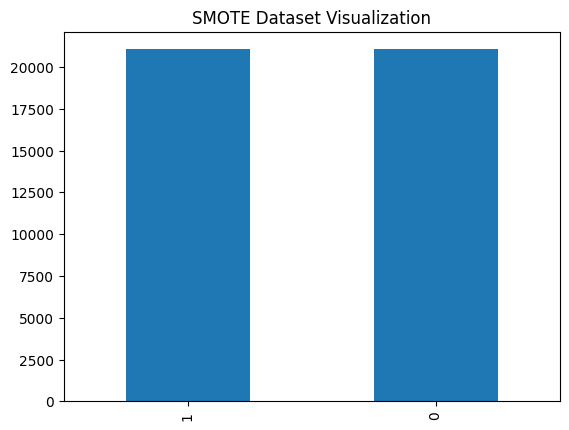

In [37]:
from imblearn.over_sampling import SMOTE# SMOTE
X_train_SMOTE, y_train_SMOTE = SMOTE().fit_resample(final, y)
#SMOTE plot
pd.Series(y_train_SMOTE).value_counts().plot(kind="bar")
plt.title("SMOTE Dataset Visualization")
plt.show()

In [38]:
final.isna().sum()

IncidentTime                  0
NumberOfVehicles              0
BodilyInjuries                0
Witnesses                     0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
InsuredZipCode                0
CapitalGains                  0
CapitalLoss                   0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
VehicleYOM                    0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
PropertyDamage                0
PoliceReport                  0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
DateOfPolicyCoverage          0
Insuranc

In [39]:
y

CustomerID
Cust10000    1
Cust10001    1
Cust10002    1
Cust10003    1
Cust10004    1
            ..
Cust9993     1
Cust9994     1
Cust9996     1
Cust9997     1
Cust9999     1
Name: ReportedFraud, Length: 28836, dtype: int64

In [40]:
def StandardScaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    a=((X - mean) / std)
    return a

In [41]:
StandardScaler(x)

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleMake,VehicleModel
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cust10000,0.851537,1.200709,0.018118,-1.430435,0.525997,1.373190,-0.277179,0.463147,-0.477146,-0.659665,1.216956,-0.844038,-0.917009,-1.541739,-0.209070,1.691411,-0.499515,0.547450,-0.151626,1.214854,-1.228326,0.105343,0.906338,0.942416,1.660156,-1.047165,-1.049132,-1.090271,-1.435643,-0.367561,-0.096701,0.049976,0.895116,0.284809,-1.152126,-1.681630
Cust10001,-0.282991,1.200709,1.292409,-0.469547,0.361906,1.857203,-0.311916,0.123263,-0.352087,-0.659665,1.719899,-0.844038,-0.916919,-0.891292,-0.209070,-0.001517,-0.499515,0.170793,-0.151626,1.214854,-1.228326,0.105343,0.906338,-1.070920,1.660156,-1.047165,-1.049132,-1.090271,-1.435643,-1.338543,1.675595,0.049976,0.895116,0.284809,-1.152126,-1.681630
Cust10002,1.661915,-0.839937,1.292409,1.452228,0.575954,0.969581,0.993227,0.323077,-0.727263,1.395487,1.567931,-1.388592,-0.916829,-0.360927,-0.909735,0.528459,-0.499515,-1.147508,0.948043,1.214854,1.188598,1.569281,-0.868004,-1.574253,-0.254375,-1.047165,0.953169,-1.090271,-1.435643,-0.367561,-0.928679,-1.179628,-1.521762,0.863825,-0.656379,0.111290
Cust10003,1.661915,-0.839937,1.292409,1.452228,0.555557,1.053826,1.078469,0.253098,-0.352087,-0.381851,0.898547,-1.736104,-0.916739,-0.130769,-0.717647,0.368018,-0.499515,-0.394193,0.948043,1.214854,1.188598,1.569281,0.462753,-1.574253,-0.254375,-1.047165,0.953169,-1.090271,-1.435643,-0.367561,1.205947,1.279579,-1.521762,-1.452238,-0.656379,0.111290
Cust10004,-0.282991,-0.839937,1.292409,-0.469547,0.049659,0.336953,-0.011397,-0.011466,-1.227498,-0.615845,-0.834616,-0.593256,-0.916649,-0.881285,-1.123777,0.440346,1.673834,0.924108,0.948043,-0.036630,1.188598,-0.626626,-0.868004,-1.574253,1.163542,0.954960,-1.049132,0.917203,0.030766,0.846166,0.993353,1.279579,0.895116,-0.873222,1.574480,1.366333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cust9993,-1.417520,-0.839937,-1.256172,1.452228,-1.820878,-1.460650,-1.418236,-1.838216,0.898501,1.358131,-0.834616,0.893521,-0.917639,1.180133,-0.840218,0.091842,-0.499515,0.359122,-1.251294,-0.036630,0.382956,0.105343,0.462753,-0.567586,0.547057,0.954960,-1.049132,-1.090271,1.008373,0.603420,0.131735,0.049976,-1.521762,-0.873222,-1.647873,-0.964462
Cust9994,0.851537,-0.839937,-1.256172,0.491340,0.886369,1.662739,0.135092,0.794687,0.648384,-0.873812,-0.834616,-0.138266,-0.917549,0.339555,-0.046252,0.080048,-0.499515,-0.394193,0.948043,-1.288114,1.188598,-0.626626,-0.868004,-0.064252,-0.706464,-1.047165,-1.049132,-1.090271,1.008373,1.574402,0.724034,1.279579,0.895116,-0.873222,0.335114,-1.054108
Cust9996,-1.741671,-0.839937,1.292409,-1.430435,0.119813,-0.066429,-0.055046,0.196469,1.773913,-0.577367,1.448527,-0.675656,-0.917369,1.890622,-0.598735,0.562269,1.251781,-0.205865,0.948043,-0.036630,1.188598,-0.626626,0.462753,0.439082,0.005919,-1.047165,-1.049132,-1.090271,0.519570,-1.581288,1.044968,-1.179628,0.549848,-1.452238,-1.647873,-0.157648


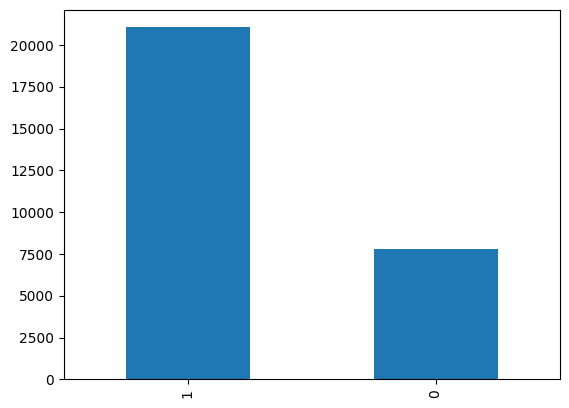

In [42]:
pd.Series(y).value_counts().plot(kind="bar")
plt.show()

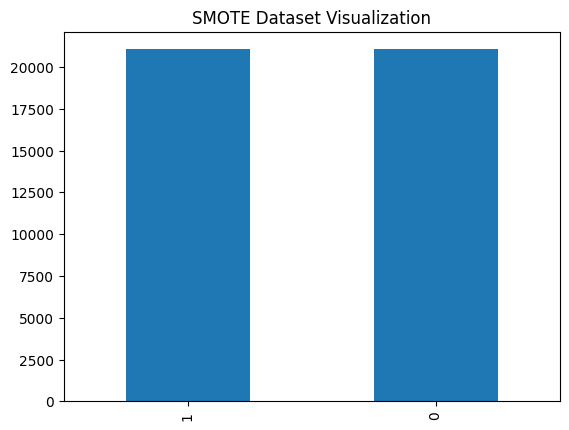

In [43]:
pd.Series(y_train_SMOTE).value_counts().plot(kind="bar")
plt.title("SMOTE Dataset Visualization")
plt.show()

In [44]:
y_train_SMOTE.shape

(42102,)

In [45]:
y.shape

(28836,)

# Test preprocessing 

In [46]:
claim_test = pd.read_csv("Test_Claim.csv")
Demog_test=pd.read_csv("Test_Demographics.csv")
policy_test=pd.read_csv("Test_Policy.csv")
vehicle_test=pd.read_csv("Test_Vehicle.csv")
target_test= pd.read_csv("Test.csv")

In [47]:
claim_test

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4,3,NO,0,0,?,68354,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16,1,?,1,1,?,55270,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20,3,NO,0,1,?,59515,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,?,Trivial Damage,None,State7,City5,Location 1449,10,1,?,2,1,?,4941,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,3,NO,2,3,NO,34650,7700,3850,23100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,2015-01-17,Single Vehicle Collision,Rear Collision,Total Loss,Police,State5,City4,Location 1958,10,1,YES,1,0,NO,61296,5785,8861,46650
8908,Cust9986,2015-02-09,Single Vehicle Collision,Front Collision,Total Loss,Other,State5,City2,Location 1035,19,1,?,1,1,YES,86729,9698,9698,67333
8909,Cust9990,2015-02-20,Single Vehicle Collision,Rear Collision,Minor Damage,Other,State5,City2,Location 2037,9,1,YES,1,2,NO,65328,12455,9281,43592
8910,Cust9995,2015-02-22,Single Vehicle Collision,Side Collision,Minor Damage,Police,State8,City3,Location 2097,19,1,YES,0,2,YES,71118,11977,11604,47537


In [48]:
Demog_test

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India
...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,28,446435,MALE,Associate,tech-support,camping,0,-53700,India
8908,Cust9986,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India
8909,Cust9990,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India
8910,Cust9995,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India


In [49]:
policy_test

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020
...,...,...,...,...,...,...,...,...,...,...
8907,148598,155,2000-03-19,State3,250/500,616,1358.80,3462442,other-relative,Cust39477
8908,148599,215,1993-07-23,State3,250/500,892,1299.82,4567362,other-relative,Cust39478
8909,148609,245,2009-12-11,State1,500/1000,1002,1361.44,9580,wife,Cust39488
8910,148610,437,2011-11-17,State1,500/1000,1902,1357.36,4510498,wife,Cust39489


In [50]:
vehicle_test

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry
...,...,...,...
35643,Cust1980,VehicleModel,95
35644,Cust17773,VehicleModel,Silverado
35645,Cust24313,VehicleID,Vehicle33407
35646,Cust5061,VehicleYOM,2003


In [51]:
target_test

,CustomerID
0,Cust10008
1,Cust10010
2,Cust10015
3,Cust10020
4,Cust1003
...,...
8907,Cust37942
8908,Cust20528
8909,Cust36797
8910,Cust28499


In [52]:
vehicle_test = vehicle_test.pivot(index='CustomerID', columns='VehicleAttribute', values='VehicleAttributeDetails').reset_index()
vehicle_test.columns.name = None  # To remove the "VehicleAttribute" label from the top row
vehicle_test

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,Vehicle37114,Accura,TL,2009
4,Cust1003,Vehicle16771,Dodge,RAM,2007
...,...,...,...,...,...
8907,Cust9984,Vehicle19062,Saab,95,2000
8908,Cust9986,Vehicle18191,Saab,92x,2000
8909,Cust9990,Vehicle11032,BMW,Civic,1998
8910,Cust9995,Vehicle30412,Jeep,Grand Cherokee,2002


In [53]:
claim_Demog_test = pd.merge(claim_test, Demog_test, how='left', on=['CustomerID'])
claim_Demog_test

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4,3,NO,0,0,?,68354,6835,8059,53460,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16,1,?,1,1,?,55270,8113,5240,41917,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20,3,NO,0,1,?,59515,7490,9110,42915,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,2015-01-03,Vehicle Theft,?,Trivial Damage,None,State7,City5,Location 1449,10,1,?,2,1,?,4941,494,866,3581,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,3,NO,2,3,NO,34650,7700,3850,23100,29,430632,FEMALE,PhD,sales,board-games,35100,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,2015-01-17,Single Vehicle Collision,Rear Collision,Total Loss,Police,State5,City4,Location 1958,10,1,YES,1,0,NO,61296,5785,8861,46650,28,446435,MALE,Associate,tech-support,camping,0,-53700,India
8908,Cust9986,2015-02-09,Single Vehicle Collision,Front Collision,Total Loss,Other,State5,City2,Location 1035,19,1,?,1,1,YES,86729,9698,9698,67333,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India
8909,Cust9990,2015-02-20,Single Vehicle Collision,Rear Collision,Minor Damage,Other,State5,City2,Location 2037,9,1,YES,1,2,NO,65328,12455,9281,43592,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India
8910,Cust9995,2015-02-22,Single Vehicle Collision,Side Collision,Minor Damage,Police,State8,City3,Location 2097,19,1,YES,0,2,YES,71118,11977,11604,47537,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India


In [54]:
claim_Demog_policy_test = pd.merge(claim_Demog_test, policy_test, how='left', on=['CustomerID'])
claim_Demog_policy_test

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4,3,NO,0,0,?,68354,6835,8059,53460,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,119129,84,1998-05-10,State2,500/1000,2000,1006.00,0,own-child
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16,1,?,1,1,?,55270,8113,5240,41917,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,119131,232,2011-11-10,State3,100/300,500,1279.17,0,unmarried
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20,3,NO,0,1,?,59515,7490,9110,42915,39,461919,MALE,JD,other-service,movies,30400,0,India,119136,218,2010-07-17,State2,250/500,1000,1454.67,1235986,other-relative
3,Cust10020,2015-01-03,Vehicle Theft,?,Trivial Damage,None,State7,City5,Location 1449,10,1,?,2,1,?,4941,494,866,3581,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,119141,205,2000-09-10,State3,500/500,2000,1287.76,5873212,wife
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,3,NO,2,3,NO,34650,7700,3850,23100,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,2015-01-17,Single Vehicle Collision,Rear Collision,Total Loss,Police,State5,City4,Location 1958,10,1,YES,1,0,NO,61296,5785,8861,46650,28,446435,MALE,Associate,tech-support,camping,0,-53700,India,119105,94,1997-10-23,State3,500/1000,673,1104.02,1959277,wife
8908,Cust9986,2015-02-09,Single Vehicle Collision,Front Collision,Total Loss,Other,State5,City2,Location 1035,19,1,?,1,1,YES,86729,9698,9698,67333,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India,119107,115,2001-08-16,State2,250/500,574,961.46,0,husband
8909,Cust9990,2015-02-20,Single Vehicle Collision,Rear Collision,Minor Damage,Other,State5,City2,Location 2037,9,1,YES,1,2,NO,65328,12455,9281,43592,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India,119111,297,2003-04-14,State2,100/300,1216,1560.49,0,wife
8910,Cust9995,2015-02-22,Single Vehicle Collision,Side Collision,Minor Damage,Police,State8,City3,Location 2097,19,1,YES,0,2,YES,71118,11977,11604,47537,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India,119116,94,1992-08-21,State2,100/300,1950,1577.48,0,wife


In [55]:
Fraud_detect_test = pd.merge(claim_Demog_policy_test, vehicle_test, how='left', on=['CustomerID'])
Fraud_detect_test 

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4,3,NO,0,0,?,68354,6835,8059,53460,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,119129,84,1998-05-10,State2,500/1000,2000,1006.00,0,own-child,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16,1,?,1,1,?,55270,8113,5240,41917,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,119131,232,2011-11-10,State3,100/300,500,1279.17,0,unmarried,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20,3,NO,0,1,?,59515,7490,9110,42915,39,461919,MALE,JD,other-service,movies,30400,0,India,119136,218,2010-07-17,State2,250/500,1000,1454.67,1235986,other-relative,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,2015-01-03,Vehicle Theft,?,Trivial Damage,None,State7,City5,Location 1449,10,1,?,2,1,?,4941,494,866,3581,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,119141,205,2000-09-10,State3,500/500,2000,1287.76,5873212,wife,Vehicle37114,Accura,TL,2009
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,3,NO,2,3,NO,34650,7700,3850,23100,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Vehicle16771,Dodge,RAM,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,2015-01-17,Single Vehicle Collision,Rear Collision,Total Loss,Police,State5,City4,Location 1958,10,1,YES,1,0,NO,61296,5785,8861,46650,28,446435,MALE,Associate,tech-support,camping,0,-53700,India,119105,94,1997-10-23,State3,500/1000,673,1104.02,1959277,wife,Vehicle19062,Saab,95,2000
8908,Cust9986,2015-02-09,Single Vehicle Collision,Front Collision,Total Loss,Other,State5,City2,Location 1035,19,1,?,1,1,YES,86729,9698,9698,67333,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India,119107,115,2001-08-16,State2,250/500,574,961.46,0,husband,Vehicle18191,Saab,92x,2000
8909,Cust9990,2015-02-20,Single Vehicle Collision,Rear Collision,Minor Damage,Other,State5,City2,Location 2037,9,1,YES,1,2,NO,65328,12455,9281,43592,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India,119111,297,2003-04-14,State2,100/300,1216,1560.49,0,wife,Vehicle11032,BMW,Civic,1998
8910,Cust9995,2015-02-22,Single Vehicle Collision,Side Collision,Minor Damage,Police,State8,City3,Location 2097,19,1,YES,0,2,YES,71118,11977,11604,47537,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India,119116,94,1992-08-21,State2,100/300,1950,1577.48,0,wife,Vehicle30412,Jeep,Grand Cherokee,2002


In [56]:
target_test

,CustomerID
0,Cust10008
1,Cust10010
2,Cust10015
3,Cust10020
4,Cust1003
...,...
8907,Cust37942
8908,Cust20528
8909,Cust36797
8910,Cust28499


In [57]:
Fraud_detect_test.isnull().sum()

CustomerID                    0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 8
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       4
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

In [58]:
for i in Fraud_detect_test.columns:
    print(i,Fraud_detect_test[i].unique())


CustomerID ['Cust10008' 'Cust10010' 'Cust10015' ... 'Cust9990' 'Cust9995' 'Cust9998']
DateOfIncident ['2015-02-05' '2015-01-13' '2015-01-05' '2015-01-03' '2015-02-22'
 '2015-02-06' '2015-01-18' '2015-01-24' '2015-02-26' '2015-01-09'
 '2015-02-03' '2015-02-23' '2015-01-10' '2015-01-12' '2015-01-16'
 '2015-02-08' '2015-01-07' '2015-02-12' '2015-02-09' '2015-02-27'
 '2015-02-13' '2015-01-06' '2015-01-08' '2015-01-17' '2015-01-15'
 '2015-02-10' '2015-01-11' '2015-02-20' '2015-02-18' '2015-02-17'
 '2015-01-22' '2015-01-28' '2015-01-29' '2015-02-24' '2015-01-19'
 '2015-02-04' '2015-01-01' '2015-01-21' '2015-01-20' '2015-02-15'
 '2015-02-14' '2015-02-25' '2015-01-27' '2015-01-25' '2015-02-28'
 '2015-01-14' '2015-01-30' '2015-02-19' '2015-02-21' '2015-02-07'
 '2015-02-02' '2015-01-23' '2015-01-02' '2015-03-03' '2015-03-04'
 '2015-01-04' '2015-01-31' '2015-03-01' '2015-02-11' '2015-01-26'
 '2015-02-16' '2015-03-02' '2015-02-01' '2015-03-07' '2015-03-09'
 '2015-03-05' '2015-03-06']
TypeOfInciden

In [59]:
Fraud_detect_test['TypeOfCollission']=Fraud_detect_test['TypeOfCollission'].replace('?',np.nan)
Fraud_detect_test['PropertyDamage']=Fraud_detect_test['PropertyDamage'].replace('?',np.nan)
Fraud_detect_test['PoliceReport']=Fraud_detect_test['PoliceReport'].replace('?',np.nan)
Fraud_detect_test['VehicleMake']=Fraud_detect_test['VehicleMake'].replace('???',np.nan)
Fraud_detect_test['Witnesses']=Fraud_detect_test['Witnesses'].replace('MISSINGVALUE',np.nan)

In [60]:
Fraud_detect_test['TypeOfCollission'].unique()

array(['Front Collision', 'Rear Collision', nan, 'Side Collision'],
      dtype=object)

In [61]:
Fraud_detect_test.isna().sum()

CustomerID                       0
DateOfIncident                   0
TypeOfIncident                   0
TypeOfCollission              1763
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentCity                     0
IncidentAddress                  0
IncidentTime                     0
NumberOfVehicles                 0
PropertyDamage                3199
BodilyInjuries                   0
Witnesses                       12
PoliceReport                  3014
AmountOfTotalClaim               0
AmountOfInjuryClaim              0
AmountOfPropertyClaim            0
AmountOfVehicleDamage            0
InsuredAge                       0
InsuredZipCode                   0
InsuredGender                    8
InsuredEducationLevel            0
InsuredOccupation                0
InsuredHobbies                   0
CapitalGains                     0
CapitalLoss                      0
Country                          4
InsurancePolicyNumbe

In [62]:
Fraud_detect_test.isna().mean().sort_values()

CustomerID                    0.000000
InsuredEducationLevel         0.000000
InsuredOccupation             0.000000
InsuredHobbies                0.000000
CapitalGains                  0.000000
CapitalLoss                   0.000000
InsurancePolicyNumber         0.000000
CustomerLoyaltyPeriod         0.000000
DateOfPolicyCoverage          0.000000
InsurancePolicyState          0.000000
Policy_CombinedSingleLimit    0.000000
Policy_Deductible             0.000000
PolicyAnnualPremium           0.000000
UmbrellaLimit                 0.000000
InsuredRelationship           0.000000
VehicleID                     0.000000
VehicleModel                  0.000000
InsuredAge                    0.000000
InsuredZipCode                0.000000
AmountOfPropertyClaim         0.000000
DateOfIncident                0.000000
TypeOfIncident                0.000000
SeverityOfIncident            0.000000
AuthoritiesContacted          0.000000
IncidentState                 0.000000
IncidentCity             

In [63]:
Fraud_detect_test.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                    int64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim             object
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

In [64]:
Fraud_detect_test['TypeOfCollission']=Fraud_detect_test['TypeOfCollission'].fillna(method="ffill")
Fraud_detect_test['PropertyDamage']=Fraud_detect_test['PropertyDamage'].fillna(method="bfill")
Fraud_detect_test['InsuredGender']=Fraud_detect_test['InsuredGender'].fillna(method="ffill")
Fraud_detect_test['PoliceReport']=Fraud_detect_test['PoliceReport'].fillna(method="bfill")
Fraud_detect_test['VehicleMake']=Fraud_detect_test['VehicleMake'].fillna(method="ffill")
Fraud_detect_test['Witnesses']=Fraud_detect_test['Witnesses'].fillna(method="ffill")
Fraud_detect_test['Country']=Fraud_detect_test['Country'].fillna(method="ffill")

In [65]:
Fraud_detect_test['PropertyDamage'].nunique()

2

In [66]:
Fraud_detect_test['PropertyDamage'].unique()

array(['NO', 'YES', nan], dtype=object)

In [67]:
Fraud_detect_test.isna().sum()

CustomerID                    0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                1
BodilyInjuries                0
Witnesses                     0
PoliceReport                  1
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

In [68]:
Fraud_detect_test.drop(Fraud_detect_test[['DateOfIncident','VehicleID' ,'InsuredHobbies','Country']], axis=1, inplace=True)


In [69]:
Fraud_detect_test['Witnesses'] = pd.to_numeric(Fraud_detect_test['Witnesses'], errors='coerce')
Fraud_detect_test['AmountOfTotalClaim'] = pd.to_numeric(Fraud_detect_test['AmountOfTotalClaim'], errors='coerce')
Fraud_detect_test['VehicleYOM'] = pd.to_numeric(Fraud_detect_test['VehicleYOM'], errors='coerce')

In [70]:
pd.set_option('display.max_columns', None)
obj_test=Fraud_detect_test.select_dtypes(include ='object')
obj_test.drop(obj_test[['CustomerID']], axis=1, inplace=True)

In [71]:
class LabelEncoder:
    def __init__(self):
        self.labels = {}

    def fit_transform(self, y):
        unique_labels = set(y)
        for i, label in enumerate(unique_labels):
            self.labels[label] = i

        encoded_labels = []
        for label in y:
            encoded_labels.append(self.labels[label])

        return encoded_labels

    def inverse_transform(self, y):
        inv_labels = {v: k for k, v in self.labels.items()}

        decoded_labels = []
        for label in y:
            decoded_labels.append(inv_labels[label])

        return decoded_labels

In [72]:
encoded_test={}
for i in obj_test.columns:
    le = LabelEncoder()
    encoded_data_test = le.fit_transform(obj_test[i])
    encoded_test[i]=encoded_data_test
encoded_test
df_test=pd.DataFrame(encoded_test)
pd.set_option('display.max_columns', None)
df_test

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleMake,VehicleModel
0,2,2,3,0,0,6,218,2,2,1,3,13,4489,2,0,0,4,20
1,3,1,3,1,4,1,816,2,2,1,6,3,1855,0,7,1,11,5
2,2,1,3,2,0,6,209,2,2,0,0,5,3302,2,6,5,0,8
3,0,1,0,3,5,1,764,2,2,1,5,10,3829,0,5,4,3,29
4,2,1,3,2,0,6,193,2,2,1,4,12,103,0,7,0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,3,1,2,2,0,2,239,1,2,0,1,1,1238,0,0,4,7,35
8908,3,2,2,4,0,6,878,1,1,1,1,7,3811,2,6,2,7,24
8909,3,1,3,4,0,6,940,1,2,1,3,6,1744,2,7,4,9,34
8910,3,0,3,2,1,3,294,1,1,0,4,0,2967,2,7,4,8,36


In [73]:
Fraud_detect_test.drop(Fraud_detect_test[['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'PropertyDamage', 'PoliceReport', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'DateOfPolicyCoverage',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel']], axis=1, inplace=True)


In [74]:
Fraud_detect_test

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM
0,Cust10008,4,3,0,0,68354.0,6835,8059,53460,27,471704,56400,-57000,119129,84,2000,1006.00,0,1995
1,Cust10010,16,1,1,1,55270.0,8113,5240,41917,40,455810,56700,-65600,119131,232,500,1279.17,0,2006
2,Cust10015,20,3,0,1,59515.0,7490,9110,42915,39,461919,30400,0,119136,218,1000,1454.67,1235986,2010
3,Cust10020,10,1,2,1,4941.0,494,866,3581,38,600904,68500,0,119141,205,2000,1287.76,5873212,2009
4,Cust1003,7,3,2,3,34650.0,7700,3850,23100,29,430632,35100,0,110124,134,2000,1413.14,5000000,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,10,1,1,0,61296.0,5785,8861,46650,28,446435,0,-53700,119105,94,673,1104.02,1959277,2000
8908,Cust9986,19,1,1,1,86729.0,9698,9698,67333,30,438237,39600,-64300,119107,115,574,961.46,0,2000
8909,Cust9990,9,1,1,2,65328.0,12455,9281,43592,44,450339,25000,0,119111,297,1216,1560.49,0,1998
8910,Cust9995,19,1,0,2,71118.0,11977,11604,47537,29,439304,75800,-28800,119116,94,1950,1577.48,0,2002


In [75]:
final_test = pd.concat([Fraud_detect_test, df_test], axis=1)
final_test

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleMake,VehicleModel
0,Cust10008,4,3,0,0,68354.0,6835,8059,53460,27,471704,56400,-57000,119129,84,2000,1006.00,0,1995,2,2,3,0,0,6,218,2,2,1,3,13,4489,2,0,0,4,20
1,Cust10010,16,1,1,1,55270.0,8113,5240,41917,40,455810,56700,-65600,119131,232,500,1279.17,0,2006,3,1,3,1,4,1,816,2,2,1,6,3,1855,0,7,1,11,5
2,Cust10015,20,3,0,1,59515.0,7490,9110,42915,39,461919,30400,0,119136,218,1000,1454.67,1235986,2010,2,1,3,2,0,6,209,2,2,0,0,5,3302,2,6,5,0,8
3,Cust10020,10,1,2,1,4941.0,494,866,3581,38,600904,68500,0,119141,205,2000,1287.76,5873212,2009,0,1,0,3,5,1,764,2,2,1,5,10,3829,0,5,4,3,29
4,Cust1003,7,3,2,3,34650.0,7700,3850,23100,29,430632,35100,0,110124,134,2000,1413.14,5000000,2007,2,1,3,2,0,6,193,2,2,1,4,12,103,0,7,0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,10,1,1,0,61296.0,5785,8861,46650,28,446435,0,-53700,119105,94,673,1104.02,1959277,2000,3,1,2,2,0,2,239,1,2,0,1,1,1238,0,0,4,7,35
8908,Cust9986,19,1,1,1,86729.0,9698,9698,67333,30,438237,39600,-64300,119107,115,574,961.46,0,2000,3,2,2,4,0,6,878,1,1,1,1,7,3811,2,6,2,7,24
8909,Cust9990,9,1,1,2,65328.0,12455,9281,43592,44,450339,25000,0,119111,297,1216,1560.49,0,1998,3,1,3,4,0,6,940,1,2,1,3,6,1744,2,7,4,9,34
8910,Cust9995,19,1,0,2,71118.0,11977,11604,47537,29,439304,75800,-28800,119116,94,1950,1577.48,0,2002,3,0,3,2,1,3,294,1,1,0,4,0,2967,2,7,4,8,36


In [76]:
final_test.set_index('CustomerID',inplace=True)

In [77]:
final_test

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleMake,VehicleModel
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cust10008,4,3,0,0,68354.0,6835,8059,53460,27,471704,56400,-57000,119129,84,2000,1006.00,0,1995,2,2,3,0,0,6,218,2,2,1,3,13,4489,2,0,0,4,20
Cust10010,16,1,1,1,55270.0,8113,5240,41917,40,455810,56700,-65600,119131,232,500,1279.17,0,2006,3,1,3,1,4,1,816,2,2,1,6,3,1855,0,7,1,11,5
Cust10015,20,3,0,1,59515.0,7490,9110,42915,39,461919,30400,0,119136,218,1000,1454.67,1235986,2010,2,1,3,2,0,6,209,2,2,0,0,5,3302,2,6,5,0,8
Cust10020,10,1,2,1,4941.0,494,866,3581,38,600904,68500,0,119141,205,2000,1287.76,5873212,2009,0,1,0,3,5,1,764,2,2,1,5,10,3829,0,5,4,3,29
Cust1003,7,3,2,3,34650.0,7700,3850,23100,29,430632,35100,0,110124,134,2000,1413.14,5000000,2007,2,1,3,2,0,6,193,2,2,1,4,12,103,0,7,0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cust9984,10,1,1,0,61296.0,5785,8861,46650,28,446435,0,-53700,119105,94,673,1104.02,1959277,2000,3,1,2,2,0,2,239,1,2,0,1,1,1238,0,0,4,7,35
Cust9986,19,1,1,1,86729.0,9698,9698,67333,30,438237,39600,-64300,119107,115,574,961.46,0,2000,3,2,2,4,0,6,878,1,1,1,1,7,3811,2,6,2,7,24
Cust9990,9,1,1,2,65328.0,12455,9281,43592,44,450339,25000,0,119111,297,1216,1560.49,0,1998,3,1,3,4,0,6,940,1,2,1,3,6,1744,2,7,4,9,34


In [78]:
final_test.dtypes

IncidentTime                    int64
NumberOfVehicles                int64
BodilyInjuries                  int64
Witnesses                       int64
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
CapitalGains                    int64
CapitalLoss                     int64
InsurancePolicyNumber           int64
CustomerLoyaltyPeriod           int64
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
VehicleYOM                      int64
TypeOfIncident                  int64
TypeOfCollission                int64
SeverityOfIncident              int64
AuthoritiesContacted            int64
IncidentState                   int64
IncidentCity                    int64
IncidentAddress                 int64
PropertyDamage                  int64
PoliceReport

In [79]:
x_test=final_test

In [80]:
x_test

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleMake,VehicleModel
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cust10008,4,3,0,0,68354.0,6835,8059,53460,27,471704,56400,-57000,119129,84,2000,1006.00,0,1995,2,2,3,0,0,6,218,2,2,1,3,13,4489,2,0,0,4,20
Cust10010,16,1,1,1,55270.0,8113,5240,41917,40,455810,56700,-65600,119131,232,500,1279.17,0,2006,3,1,3,1,4,1,816,2,2,1,6,3,1855,0,7,1,11,5
Cust10015,20,3,0,1,59515.0,7490,9110,42915,39,461919,30400,0,119136,218,1000,1454.67,1235986,2010,2,1,3,2,0,6,209,2,2,0,0,5,3302,2,6,5,0,8
Cust10020,10,1,2,1,4941.0,494,866,3581,38,600904,68500,0,119141,205,2000,1287.76,5873212,2009,0,1,0,3,5,1,764,2,2,1,5,10,3829,0,5,4,3,29
Cust1003,7,3,2,3,34650.0,7700,3850,23100,29,430632,35100,0,110124,134,2000,1413.14,5000000,2007,2,1,3,2,0,6,193,2,2,1,4,12,103,0,7,0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cust9984,10,1,1,0,61296.0,5785,8861,46650,28,446435,0,-53700,119105,94,673,1104.02,1959277,2000,3,1,2,2,0,2,239,1,2,0,1,1,1238,0,0,4,7,35
Cust9986,19,1,1,1,86729.0,9698,9698,67333,30,438237,39600,-64300,119107,115,574,961.46,0,2000,3,2,2,4,0,6,878,1,1,1,1,7,3811,2,6,2,7,24
Cust9990,9,1,1,2,65328.0,12455,9281,43592,44,450339,25000,0,119111,297,1216,1560.49,0,1998,3,1,3,4,0,6,940,1,2,1,3,6,1744,2,7,4,9,34


In [81]:
def StandardScaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    a=((X - mean) / std)
    return a

In [82]:
x_test=StandardScaler(x_test)

In [83]:
# def min_max_scaler(X):
    
#     min_val = np.min(X)
#     max_val = np.max(X)
#     scaled_X = (X - min_val) / (max_val - min_val)
#     return scaled_X

In [84]:
# x_test=min_max_scaler(x_test)

In [85]:
def normalize(X):
    x_min = np.min(X)
    x_max = np.max(X)
    X_normalized = (X - x_min) / (x_max - x_min)
    return X_normalized
normalize(x_test)

/Users/shreyanthhg/opt/anaconda3/envs/Tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/shreyanthhg/opt/anaconda3/envs/Tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleMake,VehicleModel
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cust10008,0.321429,0.666667,0.0,0.000000,0.608216,0.325647,0.342965,0.687218,0.177778,0.217963,0.561194,0.486949,0.233939,0.175732,1.000000,0.494952,0.083502,0.00,0.666667,1.0,1.000000,0.00,0.000000,1.000000,0.219095,1.0,1.0,1.0,0.500000,1.000000,0.990512,1.0,0.000,0.0,0.307692,0.540541
Cust10010,0.750000,0.000000,0.5,0.333333,0.491624,0.386536,0.222998,0.538641,0.466667,0.134687,0.564179,0.409541,0.233991,0.485356,0.000000,0.629218,0.083502,0.55,1.000000,0.5,1.000000,0.25,0.666667,0.166667,0.820101,1.0,1.0,1.0,1.000000,0.230769,0.409312,0.0,0.875,0.2,0.846154,0.135135
Cust10015,0.892857,0.666667,0.0,0.333333,0.529451,0.356854,0.387693,0.551487,0.444444,0.166695,0.302488,1.000000,0.234120,0.456067,0.333333,0.715479,0.200292,0.75,0.666667,0.5,1.000000,0.50,0.000000,1.000000,0.210050,1.0,1.0,0.0,0.000000,0.384615,0.728597,1.0,0.750,1.0,0.000000,0.216216
Cust10020,0.535714,0.000000,1.0,0.333333,0.043138,0.023536,0.036854,0.045192,0.422222,0.894906,0.681592,1.000000,0.234250,0.428870,1.000000,0.633440,0.638473,0.70,0.000000,0.5,0.000000,0.75,0.833333,0.166667,0.767839,1.0,1.0,1.0,0.833333,0.769231,0.844881,0.0,0.625,0.8,0.230769,0.783784
Cust1003,0.428571,0.666667,1.0,1.000000,0.307877,0.366859,0.163844,0.296435,0.222222,0.002766,0.349254,1.000000,0.000000,0.280335,1.000000,0.695066,0.555961,0.60,0.666667,0.5,1.000000,0.50,0.000000,1.000000,0.193970,1.0,1.0,1.0,0.666667,0.923077,0.022727,0.0,0.875,0.0,0.923077,0.378378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cust9984,0.535714,0.000000,0.5,0.000000,0.545322,0.275621,0.377096,0.599562,0.200000,0.085566,0.000000,0.516652,0.233315,0.196653,0.115333,0.543130,0.268638,0.25,1.000000,0.5,0.666667,0.50,0.000000,0.333333,0.240201,0.5,1.0,0.0,0.166667,0.076923,0.273169,0.0,0.000,0.8,0.538462,0.945946
Cust9986,0.857143,0.000000,0.5,0.333333,0.771957,0.462052,0.412716,0.865787,0.244444,0.042613,0.394030,0.421242,0.233367,0.240586,0.049333,0.473060,0.083502,0.25,1.000000,1.0,0.666667,1.00,0.000000,1.000000,0.882412,0.5,0.5,1.0,0.166667,0.538462,0.840909,1.0,0.750,0.4,0.538462,0.648649
Cust9990,0.500000,0.000000,0.5,0.666667,0.581251,0.593406,0.394970,0.560201,0.555556,0.106021,0.248756,1.000000,0.233471,0.621339,0.477333,0.767490,0.083502,0.15,1.000000,0.5,1.000000,1.00,0.000000,1.000000,0.944724,0.5,1.0,1.0,0.500000,0.461538,0.384819,1.0,0.875,0.8,0.692308,0.918919


In [86]:
class ANN:
    
    def predict(self,X, y, parameters,active_func_h,active_func_o):
        m = X.shape[1]
        p = np.zeros((1,m), dtype = np.int64)
        a3, caches = self.forward_propagation(X, parameters,active_func_h,active_func_o)
        for i in range(0, a3.shape[1]):
            if a3[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
        #print("Accuracy: "  + str(np.mean((p[0,:] == y[0]))))
        a=str(np.mean((p[0,:] == y[0])))
        return p,a
    def predict_ann(self,x_test, parameters, active_func_h, active_func_o):
        m = x_test.shape[1]
        p = np.zeros((1,m), dtype=np.int64)
        a3, caches = self.forward_propagation(x_test, parameters, active_func_h, active_func_o)
        for i in range(0, a3.shape[1]):
            if a3[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
        return p

    def update_parameters_with_gd(self,parameters, grads, learning_rate):
        L = len(parameters) // 2 # number of layers in the neural networks
        for l in range(L):
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        return parameters

    def backward_propagation(self,X, Y, cache):
        m = X.shape[1]
        (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache

        dz3 = 1./m * (a3 - Y)
        dW3 = np.dot(dz3, a2.T)
        db3 = np.sum(dz3, axis=1, keepdims = True)
        
        da2 = np.dot(W3.T, dz3)
        dz2 = np.multiply(da2, np.int64(a2 > 0))
        dW2 = np.dot(dz2, a1.T)
        db2 = np.sum(dz2, axis=1, keepdims = True)
        
        da1 = np.dot(W2.T, dz2)
        dz1 = np.multiply(da1, np.int64(a1 > 0))
        dW1 = np.dot(dz1, X.T)
        db1 = np.sum(dz1, axis=1, keepdims = True)
        
        gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
        return gradients

    def compute_cost(self,a3, Y):
        m = Y.shape[1]
        logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
        cost = 1./m * np.sum(logprobs)
        return cost

    def relu(self,x):
        s = np.maximum(0,x)
        return s
    
    def sigmoid(self,x):
        s = 1/(1+np.exp(-x))
        return s
    
    def leaky_relu(self,x, alpha=0.01):
        return np.maximum(alpha*x, x)

    def tanh(self,x):
        return np.tanh(x)

    def softmax(self,x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum()

    def elu(self,z, alpha=1):
        return np.where(z < 0, alpha * (np.exp(z) - 1), z)

    def swish(self,z, beta=1):
        return z / (1 + np.exp(-beta * z))

    def softplus(self,z):
        return np.log(1 + np.exp(z))

    def softsign(self,z):
        return z / (1 + np.abs(z))


    def forward_propagation(self,X, parameters,active_func_h,active_func_o):
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        W3 = parameters["W3"]
        b3 = parameters["b3"]
        
        if(active_func_h =='sigmoid'):
            z1 = np.dot(W1, X) + b1
            a1 = self.sigmoid(z1)
            z2 = np.dot(W2, a1) + b2
            a2 = self.sigmoid(z2)
            
        elif(active_func_h=='relu'):
            z1 = np.dot(W1, X) + b1
            a1 = self.relu(z1)
            z2 = np.dot(W2, a1) + b2
            a2 = self.relu(z2)
            
        elif(active_func_h=='leaky_relu'):
            z1 = np.dot(W1, X) + b1
            a1 = self.leaky_relu(z1)
            z2 = np.dot(W2, a1) + b2
            a2 = self.leaky_relu(z2)
            
        elif(active_func_h=='tanh'):
            z1 = np.dot(W1, X) + b1
            a1 = self.tanh(z1)
            z2 = np.dot(W2, a1) + b2
            a2 = self.tanh(z2)
            
        elif(active_func_h=='elu'):
            z1 = np.dot(W1, X) + b1
            a1 = self.elu(z1)
            z2 = np.dot(W2, a1) + b2
            a2 = self.elu(z2)
            
        elif(active_func_h=='softplus'):
            z1 = np.dot(W1, X) + b1
            a1 = self.softplus(z1)
            z2 = np.dot(W2, a1) + b2
            a2 = self.softplus(z2)
        
        if(active_func_o=='sigmoid'):
            z3 = np.dot(W3, a2) + b3
            a3 = self.sigmoid(z3)
        
        elif(active_func_o=='softmax'):
            z3 = np.dot(W3, a2) + b3
            a3 = self.softmax(z3)
        
    
        cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
        return a3, cache

    def random_mini_batches(self,X, Y, mini_batch_size = 64, seed = 0):
    
        np.random.seed(seed)            
        m = X.shape[1]                 
        mini_batches = []
        
        permutation = list(np.random.permutation(m))   
        shuffled_X = X.iloc[:, permutation]
        shuffled_Y = Y[permutation].values.reshape((1, m))
        #shuffled_Y = Y[permutation].reshape((1, m))
        

        num_complete_minibatches = math.floor(m/mini_batch_size) 
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
            mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
    
        if m % mini_batch_size != 0:
            mini_batch_X = shuffled_X.iloc[:, num_complete_minibatches * mini_batch_size : ]
            mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : ]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
    
        return mini_batches

    def initialize_parameters(self,layer_dims):
        np.random.seed(3)
        parameters = {}
        L = len(layer_dims) # number of layers in the network

        for l in range(1, L):
            parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
            parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
            assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
            assert (parameters['W' + str(l)].shape == layer_dims[l], 1)
        
        return parameters
    # GRADED FUNCTION: update_parameters_with_momentum

    def update_parameters_with_momentum(self,parameters, grads, v, beta, learning_rate):
  
        L = len(parameters) // 2
        for l in range(L):
            v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1 - beta) * grads["dW" + str(l+1)]
            v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1 - beta) * grads["db" + str(l+1)]
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v["db" + str(l+1)]
        
        return parameters, v

    def initialize_velocity(self,parameters):
        L = len(parameters) // 2 
        v = {}
        for l in range(L):
            v["dW" + str(l+1)] = np.zeros(parameters["W"+str(l+1)].shape)
            v["db" + str(l+1)] = np.zeros(parameters["b"+str(l+1)].shape)
        return v
    
    def update_parameters_with_adam(self,parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
        L = len(parameters) // 2                 
        v_corrected = {}                         
        s_corrected = {}                         
    
        for l in range(L):
            v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)]
            v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)]
            v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1)
            v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1)
            s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * (grads["dW" + str(l+1)] * grads["dW" + str(l+1)])
            s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * (grads["db" + str(l+1)] * grads["db" + str(l+1)])
            s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - beta2)
            s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2)
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)] / (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)

        return parameters, v, s

    def initialize_adam(self,parameters):
        L = len(parameters) // 2 
        v = {}
        s = {}
        for l in range(L):
            v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
            v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
            s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
            s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)    
        return v, s
    
    def model(self,X, Y, layers_dims, optimizer, learning_rate = 0.01, mini_batch_size =128, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 100, active_func_h=None, active_func_o=None, print_cost = True):
        acc=0
        L = len(layers_dims)            
        costs = []
        accuracy=[]
        t = 0                            
        seed = 10                        
        parameters = self.initialize_parameters(layers_dims)
        
        if optimizer == "gd":
            pass 
        elif optimizer == "momentum":
            v = self.initialize_velocity(parameters)
        elif optimizer == "adam":
            v, s = self.initialize_adam(parameters)
    
        for i in range(num_epochs):
            seed = seed + 1
            minibatches = self.random_mini_batches(X, Y, mini_batch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                a3, caches = self.forward_propagation(minibatch_X, parameters,active_func_h,active_func_o)
                cost = self.compute_cost(a3, minibatch_Y)
                grads = self.backward_propagation(minibatch_X, minibatch_Y, caches)
                if optimizer == "gd":
                    parameters = self.update_parameters_with_gd(parameters, grads, learning_rate)
                elif optimizer == "momentum":
                    parameters, v = self.update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
                elif optimizer == "adam":
                    t = t + 1 
                    parameters, v, s = self.update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
            
            if print_cost and i % 10 == 0:
                p,a=self.predict(minibatch_X, minibatch_Y, parameters,active_func_h,active_func_o)
                print ("Cost after epoch %i: %f" %(i, cost),'Accuracy: ',a)
            if print_cost and i % 1 == 0:
                costs.append(cost)
                p,a=self.predict(minibatch_X, minibatch_Y, parameters,active_func_h,active_func_o)
                accuracy.append(float(a))
            if print_cost and i == (num_epochs-1):
                p,a=self.predict(minibatch_X, minibatch_Y, parameters,active_func_h,active_func_o)
                acc=a
                
        
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('epochs (per 100)')
        plt.title("Cost @ Learning rate = " + str(learning_rate))
        plt.show()
        
        plt.plot(accuracy)
        plt.ylabel('accuracy')
        plt.xlabel('epochs (per 100)')
        plt.title("Accuracy @ Learning rate = " + str(learning_rate))
        plt.show()
        print ('Accuracy: ',acc)
        return parameters

<>:187: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:188: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:187: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:188: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:187: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:188: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], 1)


/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np

Cost after epoch 0: nan Accuracy:  0.9444444444444444
Cost after epoch 10: nan Accuracy:  0.9444444444444444


/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np

Cost after epoch 20: nan Accuracy:  0.9444444444444444
Cost after epoch 30: nan Accuracy:  0.9444444444444444


/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np

Cost after epoch 40: nan Accuracy:  0.9444444444444444
Cost after epoch 50: nan Accuracy:  0.9444444444444444
Cost after epoch 60: nan Accuracy:  0.9444444444444444


/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np

Cost after epoch 70: nan Accuracy:  0.9444444444444444
Cost after epoch 80: nan Accuracy:  0.9444444444444444
Cost after epoch 90: nan Accuracy:  0.9444444444444444


/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:59: RuntimeWarning: divide by zero encountered in log
  logprobs = np

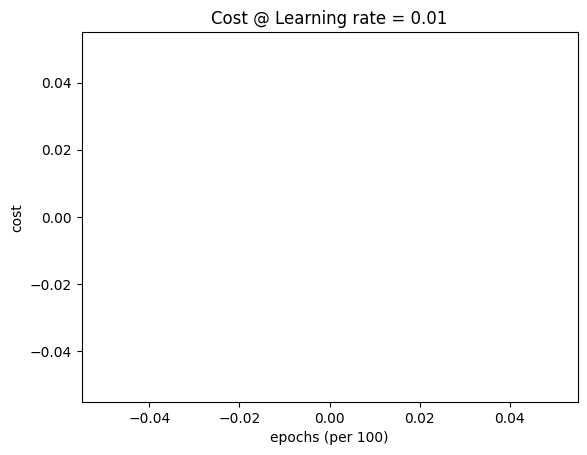

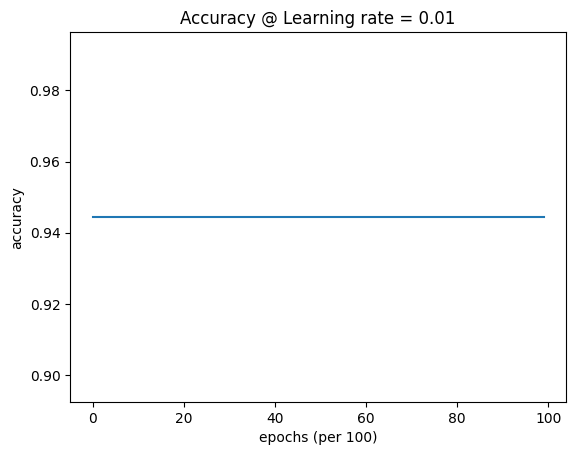

Accuracy:  0.9444444444444444


In [87]:
layers_dims = [x.shape[0], 5,3, 1]
adam=ANN()
adam_parameters = adam.model(x, y_train_SMOTE, layers_dims, optimizer = "adam",active_func_h="relu",active_func_o="sigmoid")

In [88]:
adam.predict_ann(x_test,adam_parameters,active_func_h="relu",active_func_o="sigmoid")

/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:187: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:188: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], 1)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:187: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:188: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], 1)
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_30272/2185224898.py:187: SyntaxWarning: assertion is 

ValueError: shapes (5,28836) and (8912,36) not aligned: 28836 (dim 1) != 8912 (dim 0)